# Clustering

In [265]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier

# Load Preprocessed Data from previous notebook

In [266]:
df = pd.read_csv('./preprocessed_categorical.csv')

# Feature Scaling

In [267]:
def clusterize(model):
    clusters = model.fit_predict(scaled_df)

    unscaled_features = pd.DataFrame(scaler.inverse_transform(scaled_df))
    unscaled_features.columns = df.columns
    df_clusters = pd.concat([unscaled_features, pd.Series(clusters, name='labels', index=unscaled_features.index)], axis=1)
    
    s_score = silhouette_score(scaled_df, model.labels_)
    print(f"Silhouette Score: {s_score:.3f}")
    
    return df_clusters

In [268]:
# two_dim = TSNE(random_state=42).fit_transform(df)

In [269]:
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [270]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis')
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [271]:
def assess_feature_importance(dataframe):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [272]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

<Axes: >

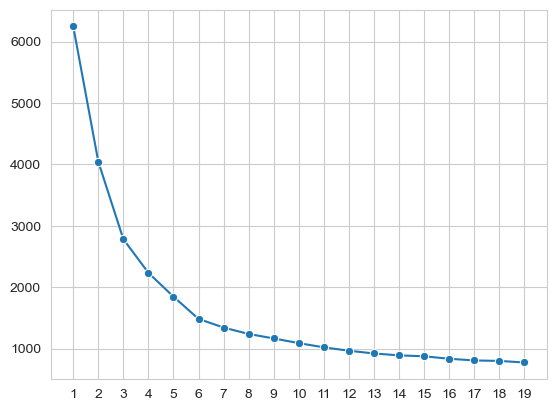

In [273]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [279]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
kmeans_4_clustered_df.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.405


labels,0,1,2,3
Income,1561.799410,2143.190746,2415.965517,2459.818287
EnrollmentDurationInDays,451.275179,1.646443,340.421960,350.953562
LastPeriodDurationInDays,296.051833,200.694020,181.230309,365.522354
DaysWithoutFrequency,107.481247,65.371890,88.107260,76.340929
LifetimeValue,384.927994,624.355316,185.903546,224.665852
NumberOfFrequencies,29.243574,84.332606,30.799274,37.332853
AttendedClasses,24.782975,28.110869,1.117060,1.552928
AllowedWeeklyVisitsBySLA,2.249473,5.028372,6.985299,6.981540
AllowedNumberOfVisitsBySLA,19.555470,34.656430,45.234740,59.918486
RealNumberOfVisits,2.592920,8.221737,5.101452,5.557543


## DBSCAN

In [275]:
dbscan = DBSCAN(eps=0.3, min_samples=50)
dbscan_clustered_df = clusterize(dbscan)

dbscan_clustered_df.groupby('labels').size()

Silhouette Score: 0.314


labels
-1     538
 0    4747
 1    6323
 2     810
 3    1106
 4     117
dtype: int64

I've tried to fine tune the parameters of DBSCAN, but in general the algorithm create very unbalanced clusters.

Because of that, I'll stick with K-Means for now.

# Checking results (double check it with ChatGPT later)
## View results
- Check if the cluster center (mean) of any variables doesn't vary much between clusters, if so, we can drop it.
- If there are clusters with too few customers, we can check if the center of the variables is similar to the other clusters, if so, we can merge them.


## Visualization
- We can plot cluster centers:
```python
df.groupby('labels') \ [scaled_features].mean().plot(kind='bar')
```

# Feature reduction
- Factor Analysis
- Multidimensional scaling